<a href="https://colab.research.google.com/github/nancymattamonroy/Data_Analysis/blob/main/Intro_EDA_MentorTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS EXPLORATORIO DE DATOS CON PYTHON

El estudio previo de los datos o EDA es una etapa crítica en la ciencia de datos, y sin duda la que consume más tiempo.

Conjunto de datos tomado de Datos Abiertos Colombia https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Resultados-de-An-lisis-de-Laboratorio-Suelos-en-Co/ch4u-f3i5/about_data

Link de consumo desde GitHub: https://raw.githubusercontent.com/nancymattamonroy/DATA/main/Resultados_suelos_en_Colombia.csv
Fases análisis:

1. Comprender el problema
2. Estudio univariable
3. Estudio multivariable
4. Limpieza básica de los datos
5. Comprobación de suposiciones

In [1]:
# Importar las librerías básicas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cargar datos:
LINK = 'https://raw.githubusercontent.com/nancymattamonroy/DATA/main/Resultados_suelos_en_Colombia.csv'
df_train = pd.read_csv(LINK )
df_train.head(5)

<ipython-input-2-983bd6faa1e6>:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(LINK )


,numfila,Departamento,Municipio,Cultivo,Estado,Tiempo Establecimiento,Topografia,Drenaje,Riego,Fertilizantes aplicados,...,Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg,Hierro (Fe) disponible doble cido mg/kg,Cobre (Cu) disponible doble acido mg/kg,Manganeso (Mn) disponible doble acido mg/kg,Zinc (Zn) disponible doble cido mg/kg,Secuencial
0,NaN,CUNDINAMARCA,FUNZA,Uchuva,POR ESTABLECER,NO APLICA,Ondulado,Bueno,No indica,No indica,...,184.118,"<1,00",2.8760000000000003,3.462,0.1094420600858369,ND,ND,ND,ND,NaN
1,NaN,CUNDINAMARCA,BITUIMA,Citricos,POR ESTABLECER,NO APLICA,Ondulado,Bueno,No cuenta con riego,No indica,...,33.181,3.426,"<1,00",90.92600000000002,0.7103004291845494,ND,ND,ND,ND,NaN
2,NaN,CUNDINAMARCA,VILLAPINZÓN,Pastos-brachiaria,ESTABLECIDO,NO INDICA,Ondulado,Bueno,No cuenta con riego,No indica,...,670.747,3.7199999999999998,8.481,2.455,0.13090128755364808,ND,ND,ND,ND,NaN
3,NaN,CUNDINAMARCA,VILLAPINZÓN,Pastos-brachiaria,ESTABLECIDO,NO INDICA,Ondulado,Bueno,No cuenta con riego,No indica,...,791.175,6.83,5.694,2.6310000000000002,0.30257510729613735,ND,ND,ND,ND,NaN
4,NaN,CUNDINAMARCA,"BOGOTÁ, D.C.",Papa de año,POR ESTABLECER,NO APLICA,Pendiente,Bueno,No cuenta con riego,"15-15-15, 18-18-18 y 10-30-10",...,1685.377,4.124,17.619,8.567,0.30257510729613735,ND,ND,ND,ND,NaN


In [3]:
#dimensiones del conjunto de datos
df_train.shape

(46745, 33)

In [4]:
# Damos un vistazo las columnas:

df_train.columns

Index(['numfila', 'Departamento', 'Municipio', 'Cultivo', 'Estado',
       'Tiempo Establecimiento', 'Topografia', 'Drenaje', 'Riego',
       'Fertilizantes aplicados', 'FechaAnalisis', 'pH agua:suelo 2,5:1,0',
       'Materia orgánica (MO) %', 'Fósforo (P) Bray II mg/kg',
       'Azufre (S) Fosfato monocalcico mg/kg', 'Acidez (Al+H) KCL cmol(+)/kg',
       'Aluminio (Al) intercambiable cmol(+)/kg',
       'Calcio (Ca) intercambiable cmol(+)/kg',
       'Magnesio (Mg) intercambiable cmol(+)/kg',
       'Potasio (K) intercambiable cmol(+)/kg',
       'Sodio (Na) intercambiable cmol(+)/kg',
       'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg',
       'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m',
       'Hierro (Fe) disponible olsen mg/kg', 'Cobre (Cu) disponible mg/kg',
       'Manganeso (Mn) disponible Olsen mg/kg',
       'Zinc (Zn) disponible Olsen mg/kg', 'Boro (B) disponible mg/kg',
       'Hierro (Fe) disponible doble  cido mg/kg',
       'Cobre (Cu) 

In [5]:
# Tipos de datos

df_train.dtypes

numfila                                                               float64
Departamento                                                           object
Municipio                                                              object
Cultivo                                                                object
Estado                                                                 object
Tiempo Establecimiento                                                 object
Topografia                                                             object
Drenaje                                                                object
Riego                                                                  object
Fertilizantes aplicados                                                object
FechaAnalisis                                                         float64
pH agua:suelo 2,5:1,0                                                  object
Materia orgánica (MO) %                                         

In [6]:
# ahora veremos el resumen estadístico

df_train.describe()

,numfila,FechaAnalisis,Materia orgánica (MO) %,capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg,Secuencial
count,0.0,0.0,46745.000000,46745.000000,0.0
mean,NaN,NaN,5.065328,10.685826,NaN
std,NaN,NaN,5.087316,9.367072,NaN
min,NaN,NaN,-0.100000,0.196087,NaN
25%,NaN,NaN,1.925183,4.436576,NaN
50%,NaN,NaN,3.210077,7.744804,NaN
75%,NaN,NaN,6.181102,13.873440,NaN
max,NaN,NaN,68.089436,140.279152,NaN


In [7]:
#otra forma de ver como estan los datos es
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46745 entries, 0 to 46744
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   numfila                                                             0 non-null      float64
 1   Departamento                                                        46745 non-null  object 
 2   Municipio                                                           46745 non-null  object 
 3   Cultivo                                                             46745 non-null  object 
 4   Estado                                                              46745 non-null  object 
 5   Tiempo Establecimiento                                              46745 non-null  object 
 6   Topografia                                                          46745 non-null  object 
 7   Drenaje      

#Conjunto de datos


##Análisis Univariado
La variable 'Cultivo' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que vamos a estudiarla con mayor detenimiento:

In [8]:
# Resumen de estadística descriptiva:

df_train['Cultivo'].describe()

count     46745
unique      237
top       Cacao
freq       5556
Name: Cultivo, dtype: object

<Axes: xlabel='Cultivo', ylabel='Count'>

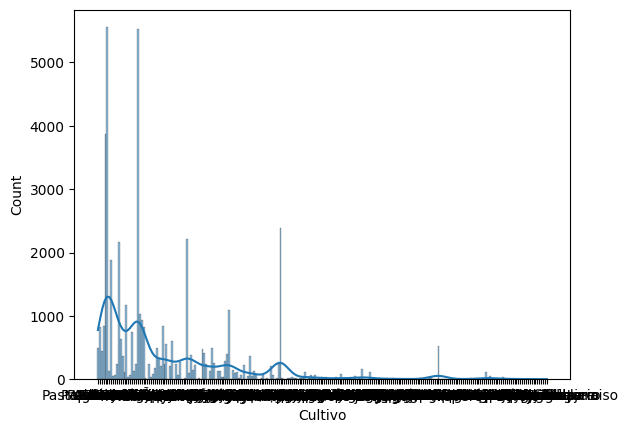

In [16]:
# Histograma:
sns.histplot(data=df_train, x="Cultivo", kde=True)

<Axes: xlabel='Cultivo', ylabel='Count'>

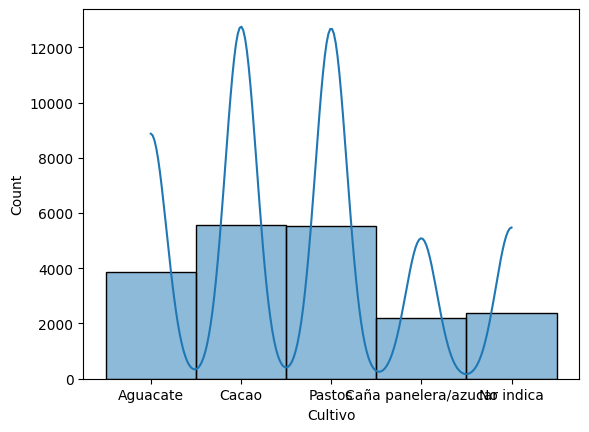

In [26]:
# prompt: diagrama de distribucion para la variable cultivo solo para los 5 mas frecuentes que se vea la campana

# Obtener los 5 valores más frecuentes de la variable 'Cultivo'.
top_5_cultivos = df_train['Cultivo'].value_counts().head(5).index.to_list()

# Filtrar el dataframe para incluir solo los 5 cultivos más frecuentes.
df_train_top_5 = df_train[df_train['Cultivo'].isin(top_5_cultivos)]

# Crear el diagrama de distribución para los 5 cultivos más frecuentes.
sns.histplot(data=df_train_top_5, x="Cultivo", kde=True)


<Axes: xlabel='Cultivo'>

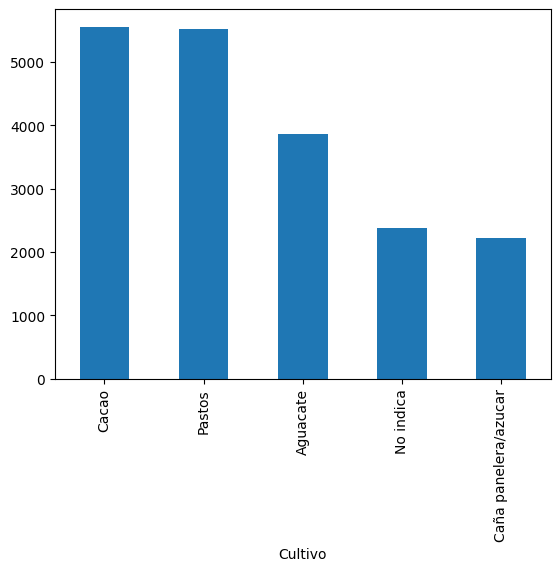

In [14]:
# histograma para la variable cultivo solo el top 5
df_train['Cultivo'].value_counts().head(5).plot.bar()